### Import packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

import os
from random import shuffle
from PIL import Image
import h5py

sns.set(style="ticks")

### Parameters

In [7]:
MEDICAL_DATA = '/home/ath0m/Desktop/LGG-segmentation'
MEDICAL_DATA_SAMPLE = os.path.join(MEDICAL_DATA, 'TCGA_CS_4941_19960909')

PATCH_SIZE = (32, 32)

### Sample images

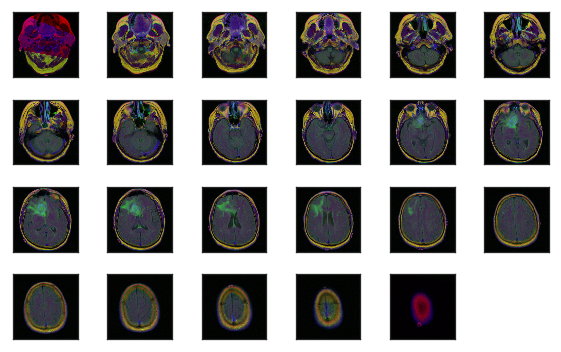

In [9]:
filenames = os.listdir(MEDICAL_DATA_SAMPLE)
filenames = [fname for fname in filenames if not fname.endswith('_mask.tif')]
filenames = sorted(filenames, key=lambda fname: int(fname[:-4].split('_')[-1]))

n = int(np.ceil(np.sqrt(len(filenames))))
fig, axes = plt.subplots(4, 6, figsize=(8, 5))

for ax in axes.flat:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

for filename, ax in zip(filenames, axes.flat):
    image_path = os.path.join(MEDICAL_DATA_SAMPLE, filename)
    image = Image.open(image_path)
    
    image_array = np.array(image)
    
    ax.imshow(image_array)

axes.flat[-1].set_visible(False)
    
plt.tight_layout()
plt.show()

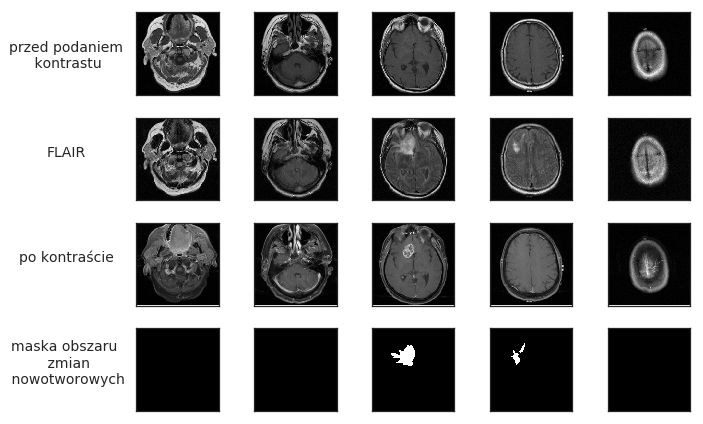

In [20]:
fig, axes = plt.subplots(4, 5, figsize=(10, 6))

for ax in axes.flat:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

for i, filename in enumerate(filenames[1::5][:5]):
    image_path = os.path.join(MEDICAL_DATA_SAMPLE, filename)
    image = Image.open(image_path)
    
    image_array = np.array(image)
    
    for d in range(3):
        axes[d, i].imshow(image_array[:, :, d], cmap='gray')
        
    mask = Image.open(image_path.split('.')[0] + '_mask.tif')
    mash_array = np.array(mask)
    axes[3, i].imshow(mash_array, cmap='gray')
        
for d, label in enumerate(['przed podaniem\n kontrastu', 'FLAIR', 'po kontraście', 'maska obszaru \n zmian\n nowotworowych']):
    axes[d, 0].set_ylabel(label, rotation=0, labelpad=70, fontsize=14)
    
for d in [0, 3]:
    axes[d, 0].yaxis.set_label_coords(-0.85, 0.3)
    
plt.tight_layout()
plt.show()

In [29]:
images = []

for filename in filenames:
    image_path = os.path.join(MEDICAL_DATA_SAMPLE, filename)
    image = np.array(Image.open(image_path))
    
    mask_path = image_path.split('.')[0] + '_mask.tif'
    mask = np.array(Image.open(mask_path))[:, :, None]
    
    images.append((image, mask))

In [30]:
from collections import Counter

image_shapes = Counter()
mask_shapes = Counter()

for image, mask in images:
    image_shapes[image.shape] += 1
    mask_shapes[mask.shape] += 1
    
print('Image shapes:', list(image_shapes))
print('Mask shapes:', list(mask_shapes))

Image shapes: [(256, 256, 3)]
Mask shapes: [(256, 256, 1)]


50625


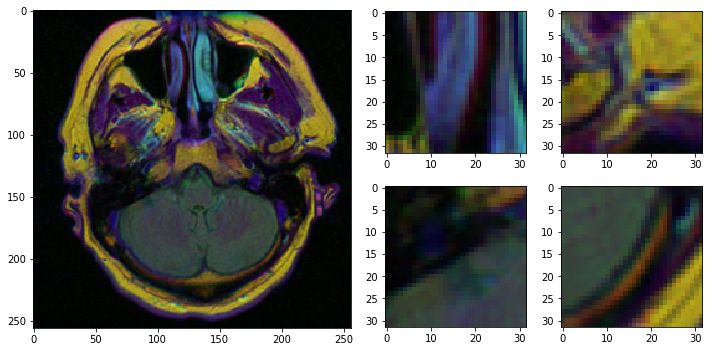

In [31]:
from sklearn.feature_extraction.image import extract_patches_2d
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(2, 4)

ax1 = plt.subplot(gs[:, :2])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])
ax4 = plt.subplot(gs[1, 2])
ax5 = plt.subplot(gs[1, 3])

image, mask = images[5]
patches = extract_patches_2d(image, patch_size=PATCH_SIZE)

print(len(patches))

ax1.imshow(image)
ax2.imshow(patches[10000])
ax3.imshow(patches[20000])
ax4.imshow(patches[30000])
ax5.imshow(patches[40000])

plt.tight_layout()
plt.show()

### Statistics

In [42]:
patients = []

for patient in os.listdir(MEDICAL_DATA):
    patient_path = os.path.join(MEDICAL_DATA, patient)
    
    if os.path.isdir(patient_path):
        patients.append(patient_path)

In [45]:
mask_filenames = []

for patient in patients:
    for filename in os.listdir(patient):
        if filename.endswith('_mask.tif'):
            mask_path = os.path.join(patient, filename)
            mask_filenames.append(mask_path)

In [47]:
masks = []

for mask_path in mask_filenames:
    mask = np.array(Image.open(mask_path))[:, :]
    masks.append(mask)
    
masks = np.array(masks)
masks = np.minimum(masks, 1)

In [75]:
print('patients:', len(patients))
print('image size:', masks.shape[1:])
print('images:', len(masks))
print('positive images:', (masks.reshape(-1, 256 * 256).sum(1) > 0).sum())
print('positive images fraction:', (masks.reshape(-1, 256 * 256).sum(1) > 0).sum() / len(masks))
print('pixels:', np.prod(masks.shape))
print('positive pixels:', masks.sum())
print('positive pixels fraction:', masks.sum() / np.prod(masks.shape))

patients: 110
image size: (256, 256)
images: 3929
positive images: 1373
positive images fraction: 0.3494527869686943
pixels: 257490944
positive pixels: 2651854
positive pixels fraction: 0.010298824334575433
